# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "imperial"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tevragh zeina
City not found. Skipping...
Processing Record 2 of Set 1 | ust-nera
Processing Record 3 of Set 1 | tofol
Processing Record 4 of Set 1 | richards bay
Processing Record 5 of Set 1 | san antonio
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | uruzgan
Processing Record 8 of Set 1 | paradera
City not found. Skipping...
Processing Record 9 of Set 1 | cururupu
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | san luis de la loma
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | aas

Processing Record 38 of Set 4 | coyhaique
Processing Record 39 of Set 4 | ugoofaaru
Processing Record 40 of Set 4 | sault ste. marie
Processing Record 41 of Set 4 | st. john's
Processing Record 42 of Set 4 | misratah
Processing Record 43 of Set 4 | kayangel
Processing Record 44 of Set 4 | kingston
Processing Record 45 of Set 4 | roghun
Processing Record 46 of Set 4 | alofi
Processing Record 47 of Set 4 | jonuta
Processing Record 48 of Set 4 | kataragama
City not found. Skipping...
Processing Record 49 of Set 4 | kalininsk
Processing Record 0 of Set 5 | fort liberte
Processing Record 1 of Set 5 | finote selam
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | hayma'
City not found. Skipping...
Processing Record 4 of Set 5 | outapi
City not found. Skipping...
Processing Record 5 of Set 5 | nabire
Processing Record 6 of Set 5 | yangchun
Processing Record 7 of Set 5 | jamestown
Processing Record 8 of Set 5 | mirny
Processing Record 9 of Set 5 | vite
Processing Re

Processing Record 29 of Set 8 | moyale
Processing Record 30 of Set 8 | viedma
Processing Record 31 of Set 8 | uturoa
Processing Record 32 of Set 8 | mirpur sakro
Processing Record 33 of Set 8 | parauapebas
Processing Record 34 of Set 8 | tyler
Processing Record 35 of Set 8 | junin
Processing Record 36 of Set 8 | ulsteinvik
Processing Record 37 of Set 8 | khanskaya
Processing Record 38 of Set 8 | vorkuta
Processing Record 39 of Set 8 | san antonio de pale
Processing Record 40 of Set 8 | howrah
Processing Record 41 of Set 8 | copala
Processing Record 42 of Set 8 | pandan
Processing Record 43 of Set 8 | zadar
Processing Record 44 of Set 8 | bayan nur
City not found. Skipping...
Processing Record 45 of Set 8 | cabedelo
Processing Record 46 of Set 8 | ahau
City not found. Skipping...
Processing Record 47 of Set 8 | mandalgovi
Processing Record 48 of Set 8 | pulgaon
Processing Record 49 of Set 8 | shimoda
Processing Record 0 of Set 9 | nadym
Processing Record 1 of Set 9 | katsuura
Processing

Processing Record 17 of Set 12 | taunggyi
Processing Record 18 of Set 12 | piacabucu
Processing Record 19 of Set 12 | seabra
Processing Record 20 of Set 12 | callao
Processing Record 21 of Set 12 | boac
Processing Record 22 of Set 12 | heyuan
Processing Record 23 of Set 12 | amarante do maranhao
Processing Record 24 of Set 12 | pyin oo lwin
Processing Record 25 of Set 12 | taulaga
Processing Record 26 of Set 12 | natal
Processing Record 27 of Set 12 | el calafate
Processing Record 28 of Set 12 | n'zeto
Processing Record 29 of Set 12 | kongsvinger
Processing Record 30 of Set 12 | marsh harbour
Processing Record 31 of Set 12 | rikaze
Processing Record 32 of Set 12 | port sudan
Processing Record 33 of Set 12 | seydi
Processing Record 34 of Set 12 | gizo
Processing Record 35 of Set 12 | tashla
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-nera,64.5667,143.2000,-34.28,99,83,5.97,RU,1706499104
1,tofol,5.3248,163.0078,87.58,62,75,11.50,FM,1706499105
2,richards bay,-28.7830,32.0377,72.95,77,10,10.98,ZA,1706499105
3,san antonio,29.4241,-98.4936,58.17,54,0,4.61,US,1706499004
4,adamstown,-25.0660,-130.1015,76.50,77,79,9.86,PN,1706499106


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,-34.28,99,83,5.97,RU,1706499104
1,tofol,5.3248,163.0078,87.58,62,75,11.50,FM,1706499105
2,richards bay,-28.7830,32.0377,72.95,77,10,10.98,ZA,1706499105
3,san antonio,29.4241,-98.4936,58.17,54,0,4.61,US,1706499004
4,adamstown,-25.0660,-130.1015,76.50,77,79,9.86,PN,1706499106


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

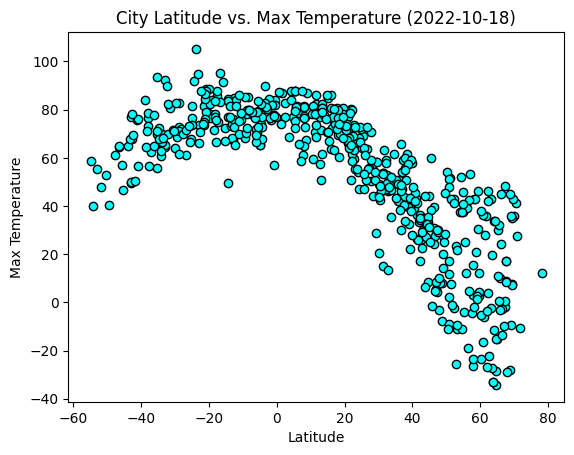

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']
plt.scatter(latitude, temperature, marker = 'o', facecolors = 'cyan', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

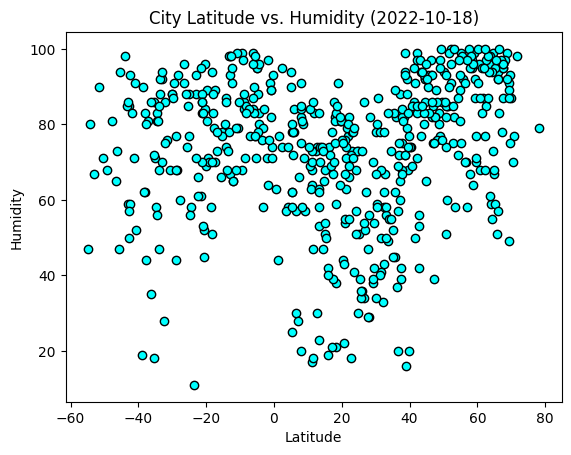

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']
plt.scatter(latitude, humidity, marker = 'o', facecolors = 'cyan', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

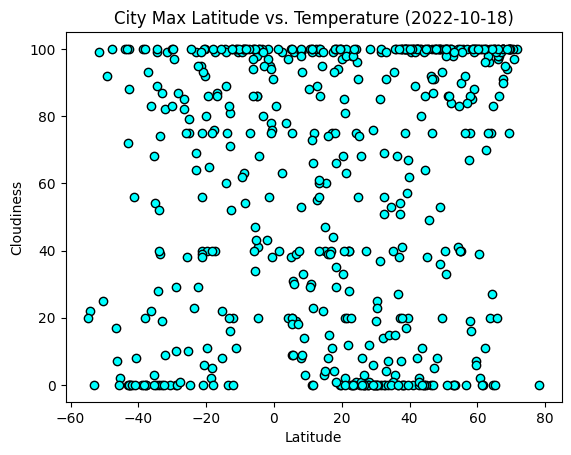

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness, marker = 'o', facecolors = 'cyan', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

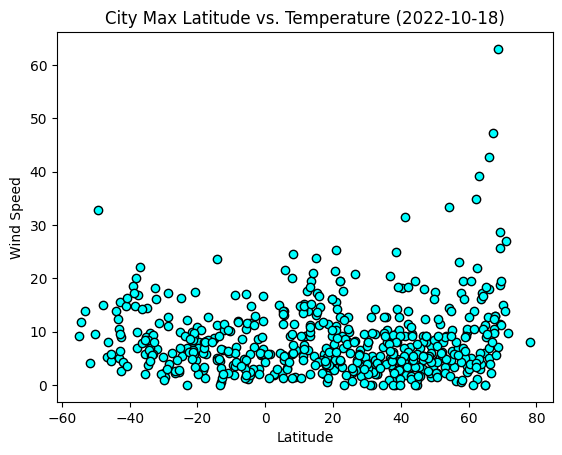

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, wind_speed, marker = 'o', facecolors = 'cyan', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def scatter_plots(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker = 'o', facecolors = 'cyan', edgecolors = 'black')
    plt.plot(x, regress_values, "r-")
    plt.xlabel('Latitude')


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat'] >= 0), :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,-34.28,99,83,5.97,RU,1706499104
1,tofol,5.3248,163.0078,87.58,62,75,11.50,FM,1706499105
3,san antonio,29.4241,-98.4936,58.17,54,0,4.61,US,1706499004
5,uruzgan,32.8333,66.0000,46.27,67,0,1.99,AF,1706499106
8,bethel,41.3712,-73.4140,36.36,86,100,9.22,US,1706499107


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat'] <= 0), :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,richards bay,-28.7830,32.0377,72.95,77,10,10.98,ZA,1706499105
4,adamstown,-25.0660,-130.1015,76.50,77,79,9.86,PN,1706499106
6,cururupu,-1.8283,-44.8683,75.65,97,100,2.98,BR,1706499107
7,port-aux-francais,-49.3500,70.2167,40.44,68,92,32.79,TF,1706499107
9,margaret river,-33.9500,115.0667,70.03,47,0,9.73,AU,1706498917


###  Temperature vs. Latitude Linear Regression Plot

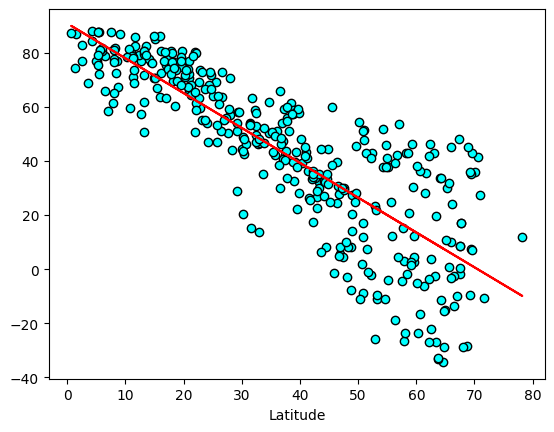

In [15]:
# Linear regression on Northern Hemisphere
northern_latitude = northern_hemi_df['Lat']
northern_temperature = northern_hemi_df['Max Temp']

scatter_plots(northern_latitude, northern_temperature)
plt.show()

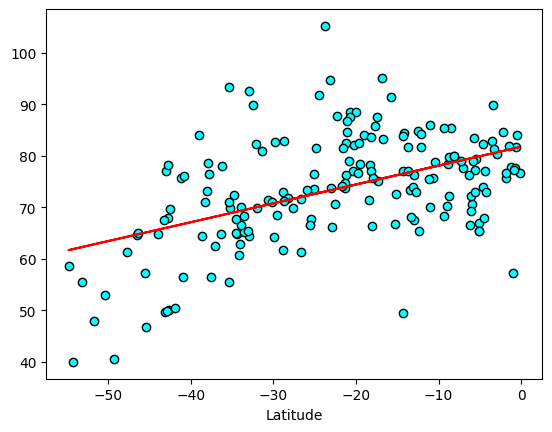

In [16]:
# Linear regression on Southern Hemisphere
southern_latitude = southern_hemi_df['Lat']
southern_temperature = southern_hemi_df['Max Temp']

scatter_plots(southern_latitude, southern_temperature)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

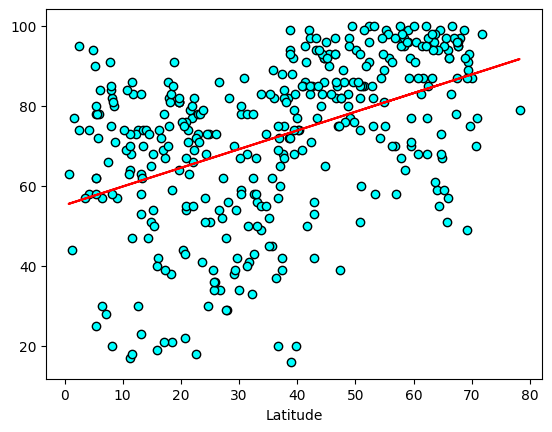

In [17]:
# Northern Hemisphere
northern_humidity = northern_hemi_df['Humidity']

scatter_plots(northern_latitude, northern_humidity)
plt.show()

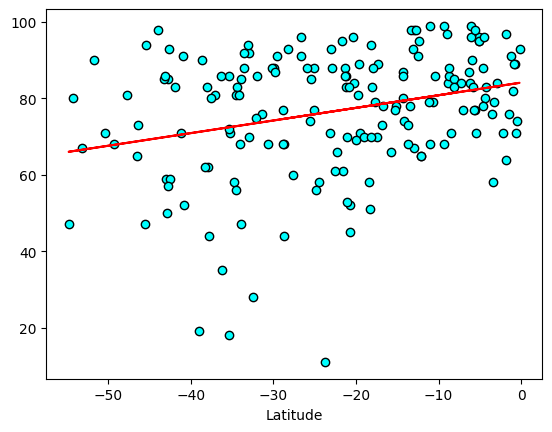

In [18]:
# Southern Hemisphere
southern_humidity = southern_hemi_df['Humidity']

scatter_plots(southern_latitude, southern_humidity)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

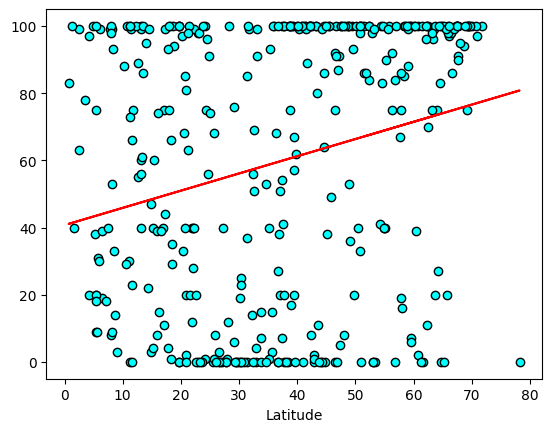

In [19]:
# Northern Hemisphere
northern_cloudiness = northern_hemi_df['Cloudiness']

scatter_plots(northern_latitude, northern_cloudiness)
plt.show()

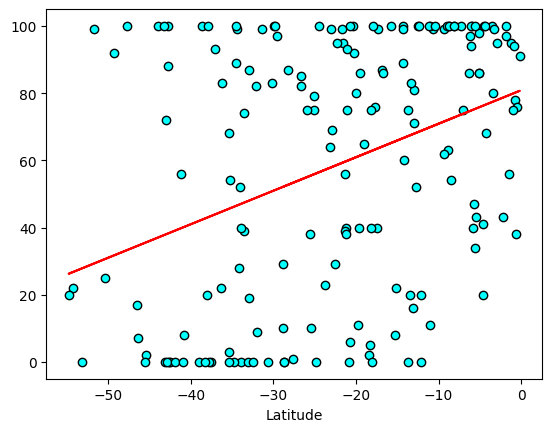

In [20]:
# Southern Hemisphere
southern_cloudiness = southern_hemi_df['Cloudiness']

scatter_plots(southern_latitude, southern_cloudiness)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

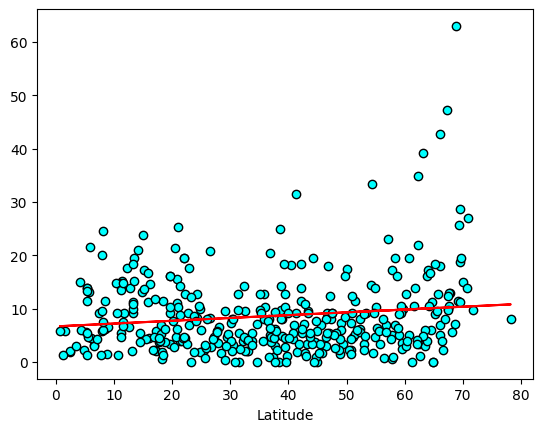

In [21]:
# Northern Hemisphere
northern_wind_speed = northern_hemi_df['Wind Speed']

scatter_plots(northern_latitude, northern_wind_speed)
plt.show()

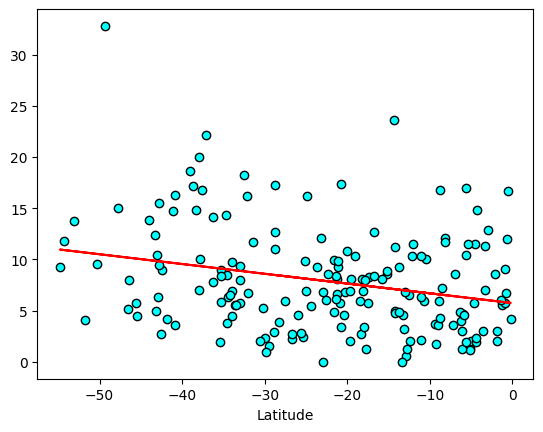

In [22]:
# Southern Hemisphere
southern_wind_speed = southern_hemi_df['Wind Speed']

scatter_plots(southern_latitude, southern_wind_speed)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE